# Data Reading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('kidney-disease-balanced.csv')

In [3]:
X_over=dataset.iloc[:,1:-1]
X_over

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,48.000000,80.000000,1.020000,1.0,0.0,0.810484,1,0,0,121.000000,...,15.400000,44.000000,7800.000000,5.200000,1.0,1,0,1,0,0
1,7.000000,50.000000,1.020000,4.0,0.0,0.810484,1,0,0,99.000000,...,11.300000,38.000000,6000.000000,4.707435,0.0,0,0,1,0,0
2,62.000000,80.000000,1.010000,2.0,3.0,1.000000,1,0,0,423.000000,...,9.600000,31.000000,7500.000000,4.707435,0.0,1,0,0,0,1
3,48.000000,70.000000,1.005000,4.0,0.0,1.000000,0,1,0,117.000000,...,11.200000,32.000000,6700.000000,3.900000,1.0,0,0,0,1,1
4,51.000000,80.000000,1.010000,2.0,0.0,1.000000,1,0,0,106.000000,...,11.600000,35.000000,7300.000000,4.600000,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,60.000000,71.152866,1.020576,0.0,0.0,1.000000,1,0,0,102.689170,...,16.180956,42.769427,10788.471340,5.630828,0.0,0,0,1,0,0
496,66.827375,61.804039,1.024549,0.0,0.0,1.000000,1,0,0,126.353029,...,17.246657,49.729394,6700.000000,5.991758,0.0,0,0,1,0,0
497,25.447789,70.000000,1.025000,0.0,0.0,0.994162,1,0,0,138.120954,...,16.309241,47.753568,5800.000000,5.609241,0.0,0,0,1,0,0
498,56.469753,63.202846,1.025000,0.0,0.0,1.000000,1,0,0,116.992884,...,16.407118,47.758008,6700.000000,6.035943,0.0,0,0,1,0,0


In [5]:
y_over=dataset.iloc[:,-1]
y_over

0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: 24, Length: 500, dtype: int64

# Scaling and Feature Selection

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X_over))
X_over = scaler.transform(X_over)

MinMaxScaler()


In [7]:
from sklearn.feature_selection import SelectKBest,chi2
selector = SelectKBest(chi2, k=9)

# Apply the SelectKBest object to the features and target
X_new = selector.fit_transform(X_over, y_over)
X_new

array([[0.75     , 0.2      , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.75     , 0.8      , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.25     , 0.4      , 0.6      , ..., 0.       , 0.       ,
        1.       ],
       ...,
       [1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.9188712, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [8]:
cols = selector.get_support(indices=True)
cols

array([ 2,  3,  4,  7, 18, 19, 20, 22, 23])

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_new, y_over, test_size = 0.30, random_state = 0)

# SVM

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12,13,14,15,16,17],
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(train_X,train_y)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(test_X)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,test_y))
#evaluation(Confusion Metrix)
# print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,test_y))

Best Hyper Parameters:
 {'C': 14, 'kernel': 'rbf'}
Accuracy: 0.9933333333333333


In [11]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# create model
# evaluate model
scores = cross_val_score(model1, X_new, y_over, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.980 (0.022)


Ideal: 0.980
> folds=2, accuracy=0.980 (0.976,0.984)
> folds=3, accuracy=0.980 (0.970,0.988)
> folds=4, accuracy=0.980 (0.960,0.992)
> folds=5, accuracy=0.980 (0.970,0.990)
> folds=6, accuracy=0.980 (0.940,1.000)
> folds=7, accuracy=0.980 (0.958,1.000)
> folds=8, accuracy=0.980 (0.952,1.000)
> folds=9, accuracy=0.980 (0.946,1.000)
> folds=10, accuracy=0.978 (0.940,1.000)


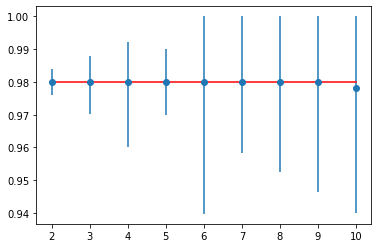

In [12]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

model = GridSearchCV(model, param_grid=params, n_jobs=-1)
# create the dataset
def get_dataset(n_samples=100):
	return X_new, y_over
 
# retrieve the model to be evaluate
def get_model():
	return model1
 
# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the dataset
	train_X, train_y = get_dataset()
	# get the model
	model = get_model()
	# evaluate the model
	scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,11)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
results = confusion_matrix(test_y, prediction)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(test_y, prediction))
print ('Classification Report : ')
print (classification_report(test_y, prediction))
print('AUC-ROC:',roc_auc_score(test_y, prediction))
print('LOGLOSS Value is',log_loss(test_y, prediction))

Confusion Matrix :
[[76  0]
 [ 1 73]]
Accuracy Score is 0.9933333333333333
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      0.99        74

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

AUC-ROC: 0.9932432432432432
LOGLOSS Value is 0.2302585092994055


Confusion Matrix : 
 [[76  0]
 [ 1 73]]
Cohen-kappa score: 0.9866619242397296


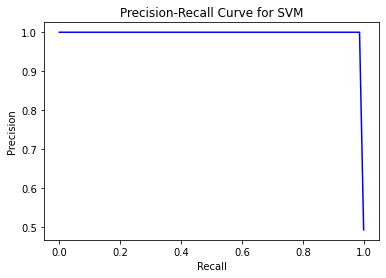

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
cm = confusion_matrix(test_y, prediction)

print ("Confusion Matrix : \n", cm)

from sklearn.metrics import cohen_kappa_score
print("Cohen-kappa score:", cohen_kappa_score(prediction,test_y))

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(test_y, prediction)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision-Recall Curve for SVM')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

# Random Forest

In [15]:
#With Hyper Parameters Tuning
#2-2,Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[n for n in range(1,150,15)],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
rf_model = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
rf_model.fit(train_X,train_y)
#The best hyper parameters set
print("Best Hyper Parameters:\n",rf_model.best_params_)
#Prediction
rf_prediction=rf_model.predict(test_X)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Testing set Accuracy:",metrics.accuracy_score(rf_prediction,test_y))

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 16, 'n_jobs': -1, 'random_state': 123}
Testing set Accuracy: 0.9866666666666667


Confusion Matrix : 
 [[76  0]
 [ 2 72]]
Cohen-kappa score: 0.9733191035218783


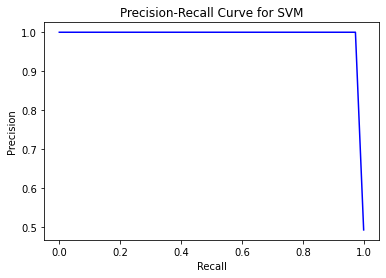

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
cm = confusion_matrix(test_y, rf_prediction)

print ("Confusion Matrix : \n", cm)

from sklearn.metrics import cohen_kappa_score
print("Cohen-kappa score:", cohen_kappa_score(rf_prediction,test_y))

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(test_y, rf_prediction)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision-Recall Curve for SVM')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

> folds=2, accuracy=0.980 (0.976,0.984)
> folds=3, accuracy=0.980 (0.970,0.988)
> folds=4, accuracy=0.980 (0.960,0.992)
> folds=5, accuracy=0.980 (0.970,0.990)
> folds=6, accuracy=0.980 (0.940,1.000)
> folds=7, accuracy=0.980 (0.958,1.000)
> folds=8, accuracy=0.980 (0.952,1.000)
> folds=9, accuracy=0.980 (0.946,1.000)
> folds=10, accuracy=0.978 (0.940,1.000)
Ideal: 0.980


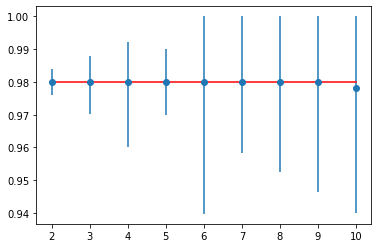

In [18]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

folds = range(2,11)
means, mins, maxs = list(),list(),list()
for k in folds:
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	k_mean, k_min, k_max = evaluate_model(cv)
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	means.append(k_mean)
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
 

ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
pyplot.show()
 
def evaluate_model(cv):
	scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
	return mean(scores), scores.min(), scores.max()


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
results = confusion_matrix(test_y, rf_prediction)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(test_y, rf_prediction))
print ('Classification Report : ')
print (classification_report(test_y, rf_prediction))
print('AUC-ROC:',roc_auc_score(test_y,rf_prediction))
print('LOGLOSS Value is',log_loss(test_y, rf_prediction))

Confusion Matrix :
[[76  0]
 [ 2 72]]
Accuracy Score is 0.9866666666666667
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       1.00      0.97      0.99        74

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

AUC-ROC: 0.9864864864864865
LOGLOSS Value is 0.46051701859881006


# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(train_X,train_y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

knn_pred = clf.predict(test_X)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, knn_pred)
 
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(test_y, knn_pred))

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1
Confusion Matrix : 
 [[76  0]
 [ 1 73]]
Accuracy :  0.9933333333333333


> folds=2, accuracy=0.969 (0.966,0.971)
> folds=3, accuracy=0.977 (0.974,0.983)
> folds=4, accuracy=0.974 (0.966,0.989)
> folds=5, accuracy=0.977 (0.971,0.986)
> folds=6, accuracy=0.977 (0.966,0.983)
> folds=7, accuracy=0.980 (0.940,1.000)
> folds=8, accuracy=0.974 (0.953,1.000)
> folds=9, accuracy=0.980 (0.949,1.000)
> folds=10, accuracy=0.977 (0.943,1.000)
Ideal: 0.980


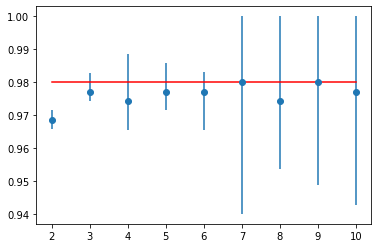

In [21]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

folds = range(2,11)
means, mins, maxs = list(),list(),list()
for k in folds:
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	k_mean, k_min, k_max = evaluate_model(cv)
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	means.append(k_mean)
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
 

ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
pyplot.show()
 
def evaluate_model(cv):
	scores = cross_val_score(clf, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
	return mean(scores), scores.min(), scores.max()

Confusion Matrix : 
 [[76  0]
 [ 1 73]]
Cohen-kappa score: 0.9866619242397296


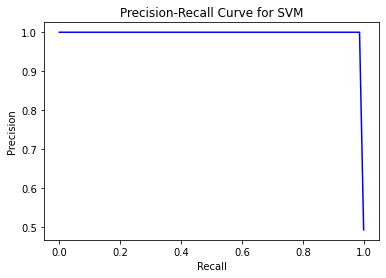

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
cm = confusion_matrix(test_y, knn_pred)

print ("Confusion Matrix : \n", cm)

from sklearn.metrics import cohen_kappa_score
print("Cohen-kappa score:", cohen_kappa_score(knn_pred,test_y))

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(test_y, knn_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision-Recall Curve for SVM')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
results = confusion_matrix(test_y, knn_pred)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(test_y, knn_pred))
print ('Classification Report : ')
print (classification_report(test_y, knn_pred))
print('AUC-ROC:',roc_auc_score(test_y,knn_pred))
print('LOGLOSS Value is',log_loss(test_y, knn_pred))

Confusion Matrix :
[[76  0]
 [ 1 73]]
Accuracy Score is 0.9933333333333333
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      0.99        74

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

AUC-ROC: 0.9932432432432432
LOGLOSS Value is 0.2302585092994055
